In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# run plots in the notebook
%matplotlib inline

In [2]:
url = "http://pbpython.com/extras/sample-salesv2.csv"

sales = pd.read_csv(url)

In [3]:
sales.columns = ['acct_num', 'name', 'sku', 'category', 'quantity', 'unit_price', 'ext_price', 'date']

In [4]:
sales.head()

,acct_num,name,sku,category,quantity,unit_price,ext_price,date
0,296809,Carroll PLC,QN-82852,Belt,13,44.48,578.24,2014-09-27 07:13:03
1,98022,Heidenreich-Bosco,MJ-21460,Shoes,19,53.62,1018.78,2014-07-29 02:10:44
2,563905,"Kerluke, Reilly and Bechtelar",AS-93055,Shirt,12,24.16,289.92,2014-03-01 10:51:24
3,93356,Waters-Walker,AS-93055,Shirt,5,82.68,413.40,2013-11-17 20:41:11
4,659366,Waelchi-Fahey,AS-93055,Shirt,18,99.64,1793.52,2014-01-03 08:14:27


In [27]:
sales.describe()

,acct_num,quantity,unit_price,ext_price
count,1000.000000,1000.000000,1000.000000,1000.00000
mean,535208.897000,10.328000,56.179630,579.84390
std,277589.746014,5.687597,25.331939,435.30381
min,93356.000000,1.000000,10.060000,10.38000
25%,299771.000000,5.750000,35.995000,232.60500
50%,563905.000000,10.000000,56.765000,471.72000
75%,750461.000000,15.000000,76.802500,878.13750
max,995267.000000,20.000000,99.970000,1994.80000


count    1000.000000
mean       56.179630
std        25.331939
min        10.060000
25%        35.995000
50%        56.765000
75%        76.802500
max        99.970000
Name: unit_price, dtype: float64

In [29]:
sales.dtypes

acct_num        int64
name           object
sku            object
category       object
quantity        int64
unit_price    float64
ext_price     float64
date           object
dtype: object

In [30]:
sales['category'].value_counts()

Shirt    404
Shoes    400
Belt     196
Name: category, dtype: int64

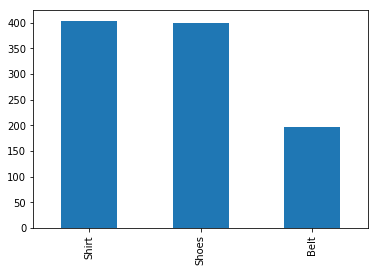

In [31]:
sales['category'].value_counts().plot(kind="bar")

In [34]:
belt_df = sales[['name', 'category', 'quantity', 'unit_price']]
belt_df = belt_df[belt_df['category']== 'Belt']

In [35]:
belt_df.head()

,name,category,quantity,unit_price
0,Carroll PLC,Belt,13,44.48
11,Hegmann and Sons,Belt,6,13.12
18,"Kihn, McClure and Denesik",Belt,15,69.52
20,"Volkman, Goyette and Lemke",Belt,13,81.19
23,Berge LLC,Belt,4,57.75


In [36]:
belt_df.sort_values(by='quantity', ascending=False).head(10)

,name,category,quantity,unit_price
612,Waters-Walker,Belt,20,62.39
802,"Senger, Upton and Breitenberg",Belt,20,51.16
994,Carroll PLC,Belt,20,14.37
268,Hegmann and Sons,Belt,20,66.27
853,Berge LLC,Belt,20,25.09
538,Huel-Haag,Belt,20,58.52
584,Heidenreich-Bosco,Belt,20,38.39
505,Cole-Eichmann,Belt,19,39.75
283,Kunze Inc,Belt,19,75.70
744,Cole-Eichmann,Belt,19,99.90


In [42]:
belt_df['belt_sales'] = belt_df.quantity * belt_df.unit_price

In [43]:
belt_df.head()

,name,category,quantity,unit_price,belt_sales
0,Carroll PLC,Belt,13,44.48,578.24
11,Hegmann and Sons,Belt,6,13.12,78.72
18,"Kihn, McClure and Denesik",Belt,15,69.52,1042.80
20,"Volkman, Goyette and Lemke",Belt,13,81.19,1055.47
23,Berge LLC,Belt,4,57.75,231.00


In [44]:
belts_by_company = belt_df.groupby('name').sum()

In [45]:
belts_by_company.head()

,quantity,unit_price,belt_sales
name,,,
Berge LLC,120,450.96,6033.53
Carroll PLC,184,733.03,9359.26
Cole-Eichmann,147,640.67,8112.70
"Davis, Kshlerin and Reilly",33,309.37,1604.13
"Ernser, Cruickshank and Lind",97,564.80,5894.38


In [46]:
belts_by_company = belt_df.groupby('name', as_index=False).sum()

In [47]:
belts_by_company.head()

,name,quantity,unit_price,belt_sales
0,Berge LLC,120,450.96,6033.53
1,Carroll PLC,184,733.03,9359.26
2,Cole-Eichmann,147,640.67,8112.70
3,"Davis, Kshlerin and Reilly",33,309.37,1604.13
4,"Ernser, Cruickshank and Lind",97,564.80,5894.38


In [50]:
top_sellers = belts_by_company.sort_values(by='belt_sales', ascending=False).head(10)

In [51]:
top_sellers

,name,quantity,unit_price,belt_sales
11,"Kihn, McClure and Denesik",164,724.29,10116.90
16,"Senger, Upton and Breitenberg",171,1033.61,9509.88
1,Carroll PLC,184,733.03,9359.26
18,Waelchi-Fahey,149,965.71,8285.72
2,Cole-Eichmann,147,640.67,8112.70
8,Heidenreich-Bosco,106,601.04,6262.94
0,Berge LLC,120,450.96,6033.53
19,Waters-Walker,83,412.07,5957.24
4,"Ernser, Cruickshank and Lind",97,564.80,5894.38
13,Koelpin PLC,133,551.83,5327.96


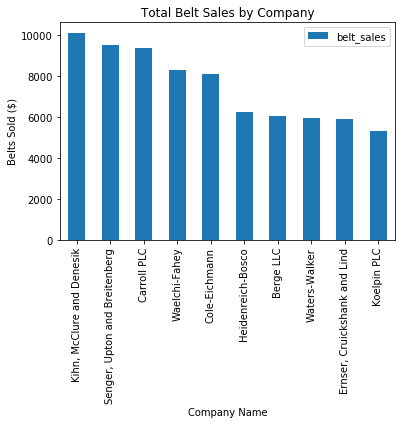

In [52]:
belt_plot = top_sellers.plot(kind="bar", 
                             title="Total Belt Sales by Company",
                             x="name",
                             y="belt_sales")
belt_plot.set_xlabel("Company Name")
belt_plot.set_ylabel("Belts Sold ($)")